## Cálculo Numérico - Exercícios Propostos 

Maitê Luisa da Silva

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative

1. Calcule o comprimento do cabo (C) entre duas torres de transmissão (i.e. a catenária) [4]. A distância entre as torres é de d = 500m. A flecha máxima permitida é fmax = 50m. Flecha é a distância vertical entre uma reta que liga os dois pontos de fixação. A flecha (f) depende do comprimento do vão (d) e da tração (C) aplicada ao cabo. O seu modelo matemático pode ser:


                                                 f = C*(cosh(d/(2C))-1)

                                              f(C) = C*(cosh(d/(2C))-1) - f

In [2]:
def f(c, d=500, f=50): return c*np.cosh(d/(2*c))-f-c

def bissection(x1,x2,TOL,iter=100):
    
    if f(x1)*f(x2) > 0:
        print("Nenhuma raíz encontrada neste intervalo.")
    else:
        i=0
        e=abs(f(x2)-f(x1))
        
    while e > TOL and i < iter:
        mp=(x1+x2)/2.0 #ponto médio
        if f(mp) ==0:
            return[mp, i]
        i = i + 1 # é contado como iteração a cada bissecção
        if f(x1)*f(mp)<0:
            x2=mp
        else: # f(x2)*f(mp)<0
            x1=mp
        e=abs(f(x2)-f(x1))
    return{"mp":mp, "i": i}

In [3]:
res=bissection(620,680,0.00001)
print(res)

{'mp': 633.1621932983398, 'i': 19}


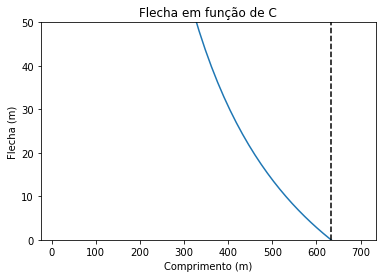

In [4]:
x=np.linspace(10,700)
plt.ylim(0,50)
plt.plot(x,f(x))
plt.axvline(x=633.16219,c='k', ls = '--')
plt.title('Flecha em função de C')
plt.xlabel('Comprimento (m)')
plt.ylabel('Flecha (m)')
plt.show()

2. Um retificador de meia onda a diodo alimenta uma carga indutiva-resistiva (f = 1 kHz, L = 100 mH e R = 1 kohm). Encontre o ângulo para o qual a corrente Id no diodo se anula. Considere o seguinte modelo matemático:

                                    Id = sen(beta-phi)+sen(phi)*e^(-beta/tan(phi))
                                            tan(phi) = 2*pi*f*L/R

In [5]:
def Id(beta, f=1000, L=0.1, R=1000): #função da corrente
    return np.sin(beta*np.pi/180-np.arctan(2*np.pi*f*L/R))+np.sin(np.arctan(2*np.pi*f*L/R))*np.exp(-beta*(np.pi/180)/(2*np.pi*f*L/R)) 
#beta está em graus

def d(x): #função da derivada de Id no ponto x
    return derivative(Id, x)

def newtonraphson(xi,TOL, iter=100):
    i = 0
    while abs(Id(xi)/d(xi)) > TOL and i<iter:
        xi=xi-Id(xi)/d(xi) # X(i++) = x(i) - f(x(i))/d(f(x(i)))
        i=i+1
    return{"x": xi, "i": i} #apresentando o beta em graus

In [6]:
newtonraphson(270,0.00001) 

{'x': 212.22581792320096, 'i': 4}

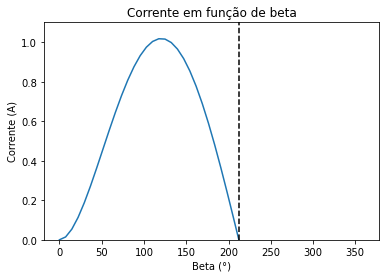

In [7]:
x=np.linspace(0,360)
plt.plot(x,Id(x))
plt.ylim(0,1.1)
plt.axvline(x=212.22581,c='k', ls = '--')
plt.title('Corrente em função de beta')
plt.xlabel('Beta (°)')
plt.ylabel('Corrente (A)')
plt.show()